In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [48]:
##data collection and processing

df=pd.read_csv('data.csv')

*Exploratory data analysis*

In [49]:
df.shape

(569, 33)

In [50]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [52]:
##for slicing columns from dataset , use loc 

df=df.loc[:,~df.columns.str.contains('^Unnamed')]

In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [54]:
##FINDING THE zeros or the outliers

zeros=(df==0).sum()

In [55]:
zeros

id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean             13
concave points_mean        13
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se               13
concave points_se          13
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst            13
concave points_worst       13
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

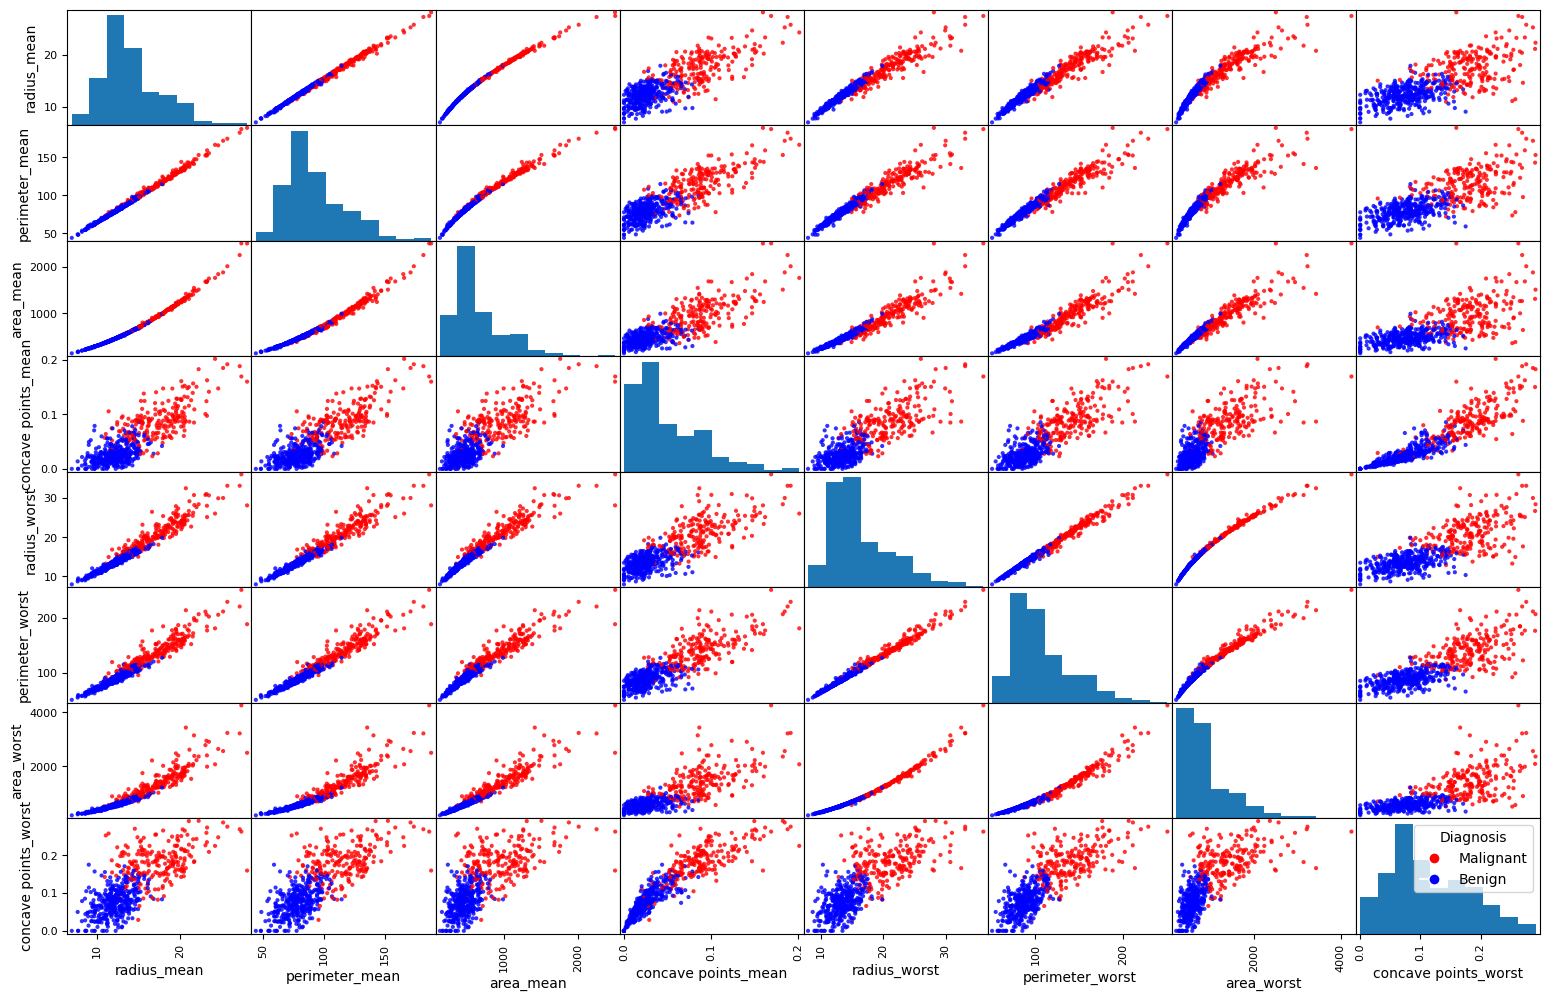

In [56]:
cols = ["radius_mean","perimeter_mean","area_mean","concave points_mean","radius_worst","perimeter_worst","area_worst","concave points_worst"]
df_subset = df[cols]
pd.plotting.scatter_matrix(df_subset, alpha=0.8, figsize=(19, 12), diagonal="hist", c=df['diagnosis'].map({"M": "red", "B": "blue"}))
handles = [plt.Line2D([0], [0], marker='o', color='w', label='Malignant', markerfacecolor='red', markersize=8),
           plt.Line2D([0], [0], marker='o', color='w', label='Benign', markerfacecolor='blue', markersize=8)]
plt.legend(handles=handles, title="Diagnosis")
plt.show()

**A tight cluster of points suggests a strong relationship between the features.**

In [57]:
df['diagnosis'].value_counts()


diagnosis
B    357
M    212
Name: count, dtype: int64

In [61]:
L=LabelEncoder()
df['diagnosis']=L.fit_transform(df['diagnosis'])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Now let us find the correlation matrix ato find the main features**

In [62]:
matrix=df.corr()

In [63]:
matrix

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


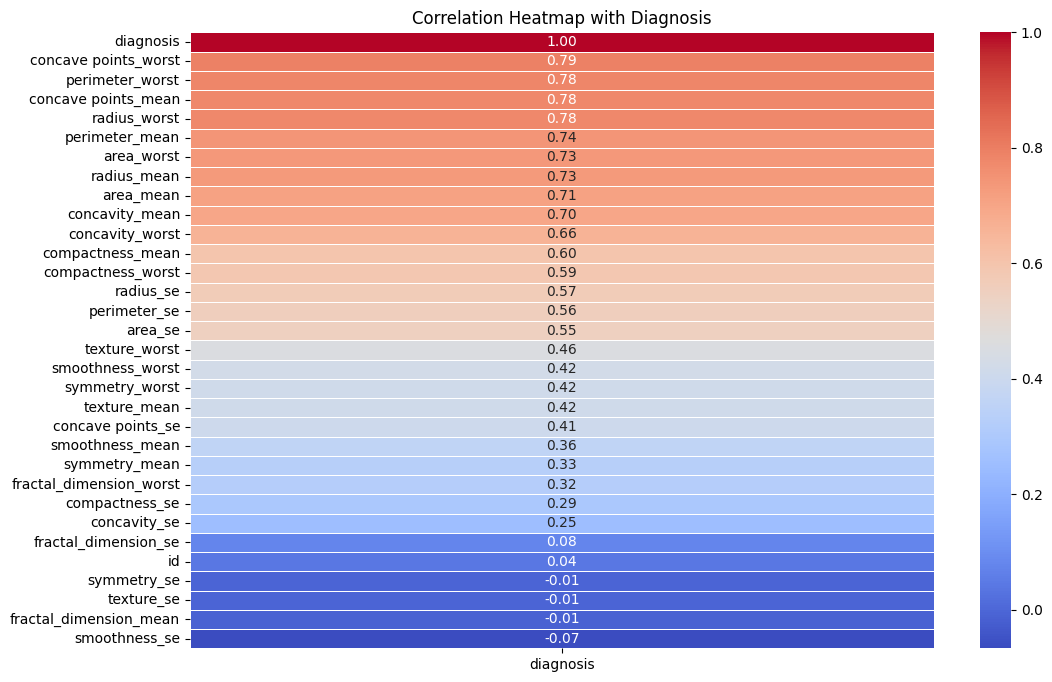

In [64]:
plt.figure(figsize=(12, 8))
sns.heatmap(matrix[["diagnosis"]].sort_values(by="diagnosis", ascending=False),
            annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap with Diagnosis")
plt.show()

C:\Users\17385\AppData\Local\Temp\ipykernel_5180\2270473693.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette="viridis")


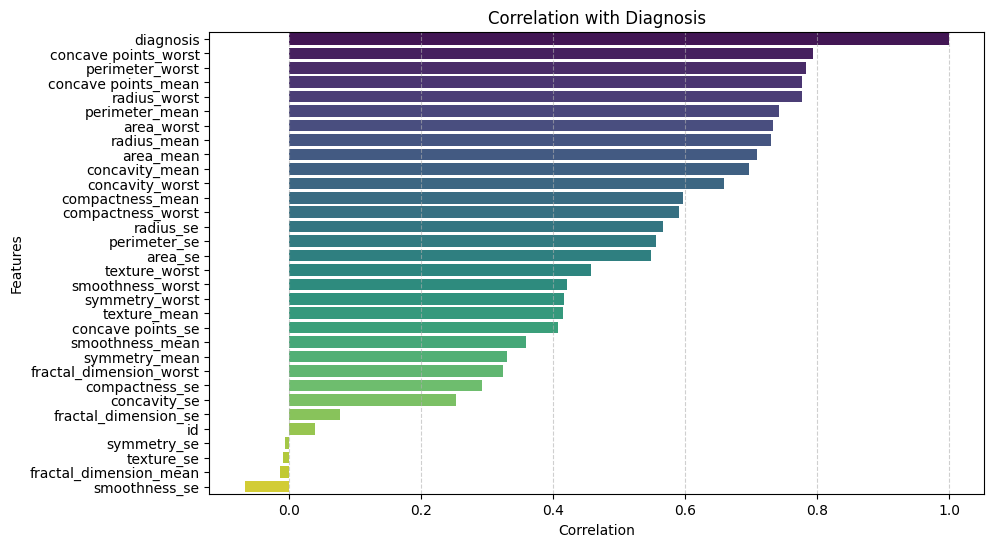

In [65]:
sorted_correlations = matrix["diagnosis"].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette="viridis")
plt.title("Correlation with Diagnosis")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

**If we assume the threshold value to be 0.4...we can consider the values lesser the 0.4 to be removed**

In [66]:
columns_to_drop = ['texture_se','smoothness_se','symmetry_se','fractal_dimension_se','id', 'fractal_dimension_mean','smoothness_mean','symmetry_mean','compactness_se','concavity_se','fractal_dimension_worst']
df=df.drop(columns=columns_to_drop)
matrix=df.corr()
matrix["diagnosis"].sort_values(ascending=False)

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
compactness_mean        0.596534
compactness_worst       0.590998
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
texture_worst           0.456903
smoothness_worst        0.421465
symmetry_worst          0.416294
texture_mean            0.415185
concave points_se       0.408042
Name: diagnosis, dtype: float64

**we need to reduce the differentce between values as the expoential is big..before tht we eliminate the diagnosis values**

In [69]:
train_data=df['diagnosis']
df.drop('diagnosis',axis=1)

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,17.99,10.38,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,0.01587,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,0.01340,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,0.02058,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,0.01867,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,0.01885,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,0.02454,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060
565,20.13,28.25,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,0.01678,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572
566,16.60,28.08,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,0.01557,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218
567,20.60,29.33,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,0.01664,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087


**Now lets scale the values and make the dataset balanced**

In [72]:
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)
scaled_data=pd.DataFrame(scaled_data,columns=df.columns)
scaled_data.head()
scaled_data['diagnosis']=train_data


In [77]:
X=df.drop('diagnosis' ,axis=1)
y=df['diagnosis']

In [80]:
y


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import time

In [136]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

**Decision classifier**

In [137]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train,y_train)
y_pred_decision=decision_tree.predict(X_test)
accuracy=accuracy_score(y_test,y_pred_decision)
conf_matrix=confusion_matrix(y_test,y_pred_decision)
classification_rep=classification_report(y_test,y_pred_decision)


print("Accuracy", accuracy)
print("Confusion matrix", conf_matrix)
print("Classification report", classification_rep)


Accuracy 0.9210526315789473
Confusion matrix [[66  5]
 [ 4 39]]
Classification report               precision    recall  f1-score   support

           0       0.94      0.93      0.94        71
           1       0.89      0.91      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



**We can see that our model gives us accuracy of 92.10%**

**Now let us apply grid search and randomized search**

**GRID SEARCH**

In [138]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

decision_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')

start_time = time.time()  

grid_search.fit(X_train, y_train)

end_time = time.time()  
grid_search_time = end_time - start_time
best_params = grid_search.best_params_

best_model = DecisionTreeClassifier(**best_params)

start_time = time.time() 

best_model.fit(X_train, y_train)

end_time = time.time()  

training_time = end_time - start_time

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best Hyperparameters:", best_params)
print("Validation Accuracy (cross-validated):", grid_search.best_score_)
print("Test Accuracy:", test_accuracy)
print("Grid Search Time (seconds):", grid_search_time)
print("Training Time (seconds):", training_time)

Best Hyperparameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Validation Accuracy (cross-validated): 0.9516483516483516
Test Accuracy: 0.9473684210526315
Grid Search Time (seconds): 5.374236822128296
Training Time (seconds): 0.006335735321044922


**RANDOMIZED SEARCH**

In [139]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

n_iter = 100

randomized_search = RandomizedSearchCV(
    estimator=decision_tree, param_distributions=param_grid, 
    n_iter=n_iter, scoring='accuracy', cv=5, n_jobs=-1)

start_time = time.time()
randomized_search.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time

best_params = randomized_search.best_params_

best_model = randomized_search.best_estimator_

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best Hyperparameters:", best_params)
print("Best Accuracy (Validation):", randomized_search.best_score_)
print("Test Accuracy:", test_accuracy)
print("Total Time Taken (seconds):", total_time)

C:\Users\17385\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'criterion': 'entropy', 'class_weight': None}
Best Accuracy (Validation): 0.9472527472527472
Test Accuracy: 0.9385964912280702
Total Time Taken (seconds): 0.21687054634094238


**RANDOM FOREST CLASSFIIER**

In [140]:
random_forest=RandomForestClassifier(random_state=42)
random_forest.fit(X_train,y_train)
y_pred_random_forest=random_forest.predict(X_test)
accuracy=accuracy_score(y_test,y_pred_random_forest)
classification_rep=classification_report(y_test,y_pred_random_forest)
conf_matrix=confusion_matrix(y_test,y_pred_random_forest)

print("Accuracy", accuracy)
print('confusion matrix', conf_matrix)
print('classification report', classification_rep)

Accuracy 0.9649122807017544
confusion matrix [[70  1]
 [ 3 40]]
classification report               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



**The model has an accuracy of 96.4 which shows tht the accuracy is very close to acutal data**

**LOGISTIC REGRESSION**

**Main use of logisitic regression  is tht it can be used for binary out classification**

In [141]:
lg = LogisticRegression(random_state=42)
lg.fit(X_train, y_train)


y_pred_train=lg.predict(X_train)
accuracy_train=accuracy_score(y_train,y_pred_train)
print("Accuracytrain:",accuracy_train)
y_pred = lg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracytrain: 0.9560439560439561
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[70  1]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



C:\Users\17385\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**GRID SEARCH**

In [142]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10], 
    'penalty': ['l1', 'l2'],         
    'solver': ['liblinear'],         
    'max_iter': [100, 200, 300],    
    'class_weight': [None, 'balanced']
}


grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

start_time = time.time()

grid_search.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Data:", accuracy)
print("Total Time Taken (seconds):", total_time)

C:\Users\17385\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\17385\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\17385\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\17385\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\17385\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

Best Hyperparameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on Test Data: 0.9824561403508771
Total Time Taken (seconds): 9.921420335769653


**RANDOMIZED SEARCH**

In [143]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  
    'penalty': ['l1', 'l2'],         
    'solver': ['liblinear'],         
    'max_iter': [100, 200, 300],    
    'class_weight': [None, 'balanced']
}
n_iter = 100  
randomized_search = RandomizedSearchCV(
    estimator=lg, param_distributions=param_grid, 
    n_iter=n_iter, scoring='accuracy', cv=5, n_jobs=-1)

start_time = time.time()

randomized_search.fit(X_train, y_train)

end_time = time.time()
total_time = end_time - start_time

best_params = randomized_search.best_params_
best_model = randomized_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)

print("Accuracy on Test Data:", accuracy)

print("Total Time Taken (seconds):", total_time)

C:\Users\17385\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'class_weight': 'balanced', 'C': 10}
Accuracy on Test Data: 0.9824561403508771
Total Time Taken (seconds): 1.4635403156280518


**Usually we face overfitting in logisiticregression so in order to reduce overfiiting we use regularization**

**REGUALRIZATION FOR LOGISTIC REGRESSION**

In [144]:
logistic_regression_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0, random_state=42)
logistic_regression_l2.fit(X_train, y_train)
y_pred_l2 = logistic_regression_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print("Accuracy with L2 Regularization:", accuracy_l2)

Accuracy with L2 Regularization: 0.9649122807017544


In [145]:
logistic_regression_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0, random_state=42)
logistic_regression_l2.fit(X_train, y_train)
y_pred_l2 = logistic_regression_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print("Accuracy with L2 Regularization:", accuracy_l2)



Accuracy with L2 Regularization: 0.9649122807017544
